In [ ]:
import pandas as pd
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style('darkgrid')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Dataset is taken from [here](https://www.kaggle.com/datasets/surajjha101/myntra-reviews-on-women-dresses-comprehensive).

# **EDA**

In [ ]:
data = pd.read_csv("WomenDressesReviewsDataset .csv")

In [ ]:
data.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   s.no                  23486 non-null  int64 
 1   age                   23486 non-null  int64 
 2   division_name         23472 non-null  object
 3   department_name       23472 non-null  object
 4   class_name            23472 non-null  object
 5   clothing_id           23486 non-null  int64 
 6   title                 19676 non-null  object
 7   review_text           22641 non-null  object
 8   alike_feedback_count  23486 non-null  int64 
 9   rating                23486 non-null  int64 
 10  recommend_index       23486 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
# We'll not use reviews and their titles in the analysis, so let's delete these columns
data.drop(columns=['title', 'review_text'], inplace=True)

In [ ]:
#Let's check missing data
data.isnull().sum()

s.no                     0
age                      0
division_name           14
department_name         14
class_name              14
clothing_id              0
alike_feedback_count     0
rating                   0
recommend_index          0
dtype: int64

In [ ]:
# not so many missing data, we can just delete rows with gaps
data.dropna(inplace=True)

In [ ]:
data.nunique()

s.no                    23472
age                        77
division_name               3
department_name             6
class_name                 20
clothing_id              1199
alike_feedback_count       82
rating                      5
recommend_index             2
dtype: int64

In [ ]:
data.describe()

,s.no,age,clothing_id,alike_feedback_count,rating,recommend_index
count,23472.000000,23472.000000,23472.000000,23472.000000,23472.000000,23472.000000
mean,11742.275349,43.200707,918.486665,2.537151,4.195552,0.822256
std,6779.370967,12.280913,202.727678,5.703597,1.110188,0.382305
min,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000
25%,5871.750000,34.000000,861.000000,0.000000,4.000000,1.000000
50%,11742.500000,41.000000,936.000000,1.000000,5.000000,1.000000
75%,17613.250000,52.000000,1078.000000,3.000000,5.000000,1.000000
max,23485.000000,99.000000,1205.000000,122.000000,5.000000,1.000000


In [ ]:
data.rename(columns={'recommend_index ':'recommend_index'}, inplace=True)
data.columns

Index(['s.no', 'age', 'division_name', 'department_name', 'class_name',
       'clothing_id', 'alike_feedback_count', 'rating', 'recommend_index'],
      dtype='object')

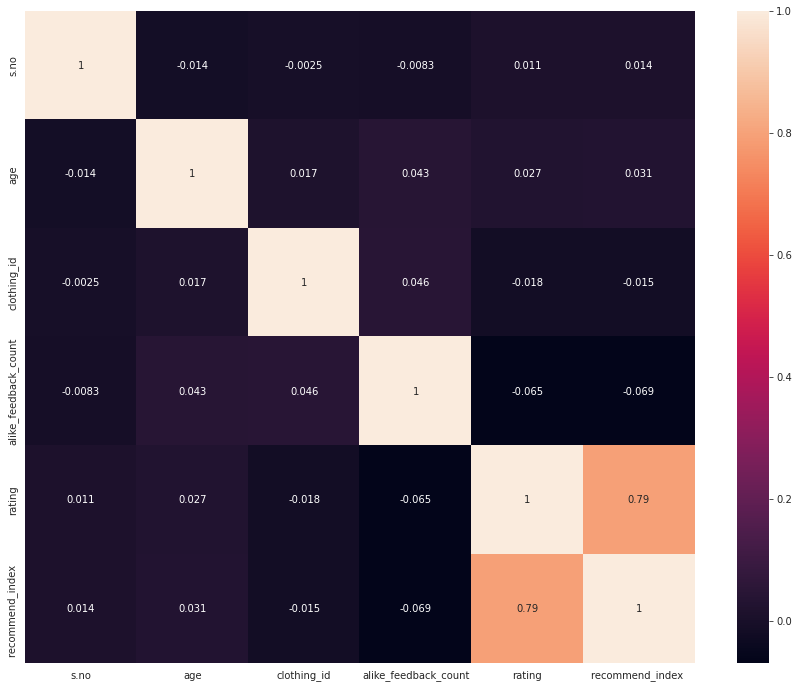

In [ ]:
plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(), annot = True)
plt.show()

Whether customer recommends a clothing or not correlates with the rating she gives. Other features are not so correlated

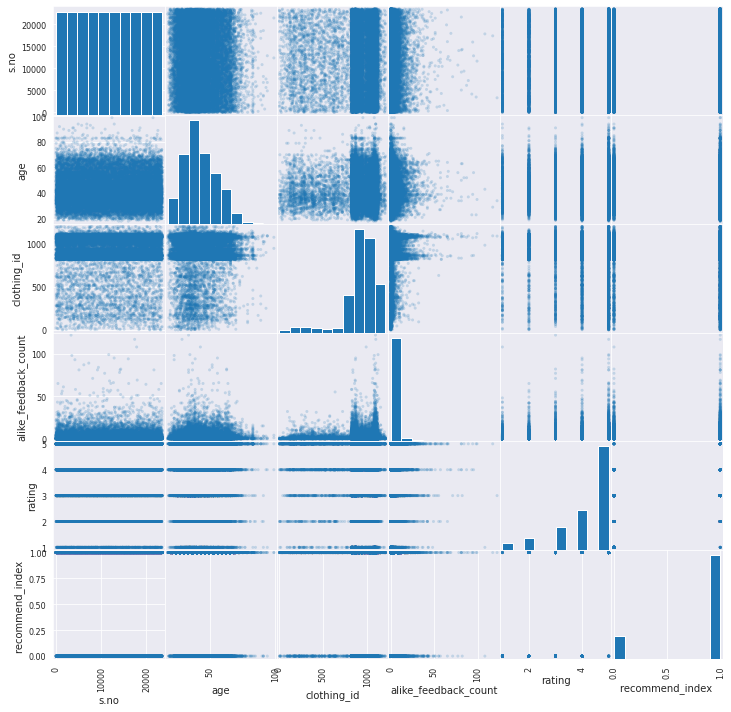

In [ ]:
pd.plotting.scatter_matrix(data, diagonal='hist', figsize=(12, 12), alpha=0.2)
plt.show()

Let's look at the distributions of different features

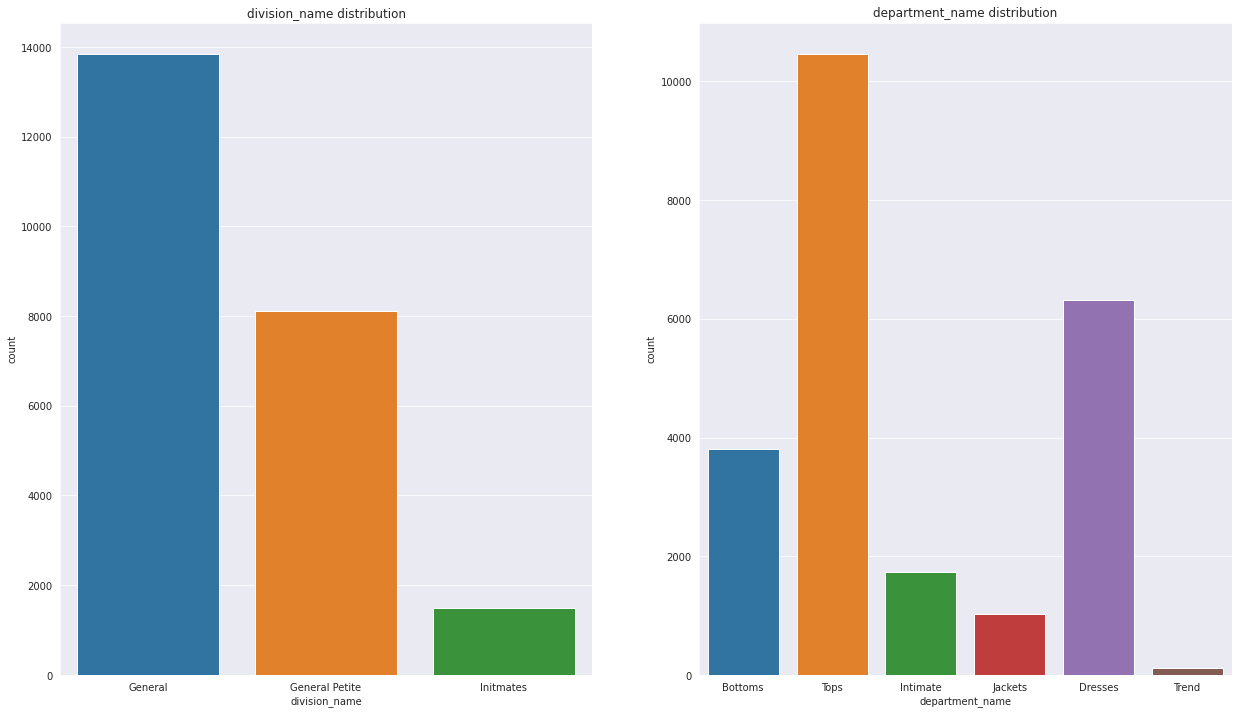

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(21, 12))

col_list = ['division_name', 'department_name']
for col, ax in zip(col_list, axes.flat):
    sns.countplot(x=col, data=data, ax=ax)
    ax.set_title(f'{col} distribution')
plt.show()

**The most popular deparments are tops and dresses. Jackets and trends are less frequently bought.**

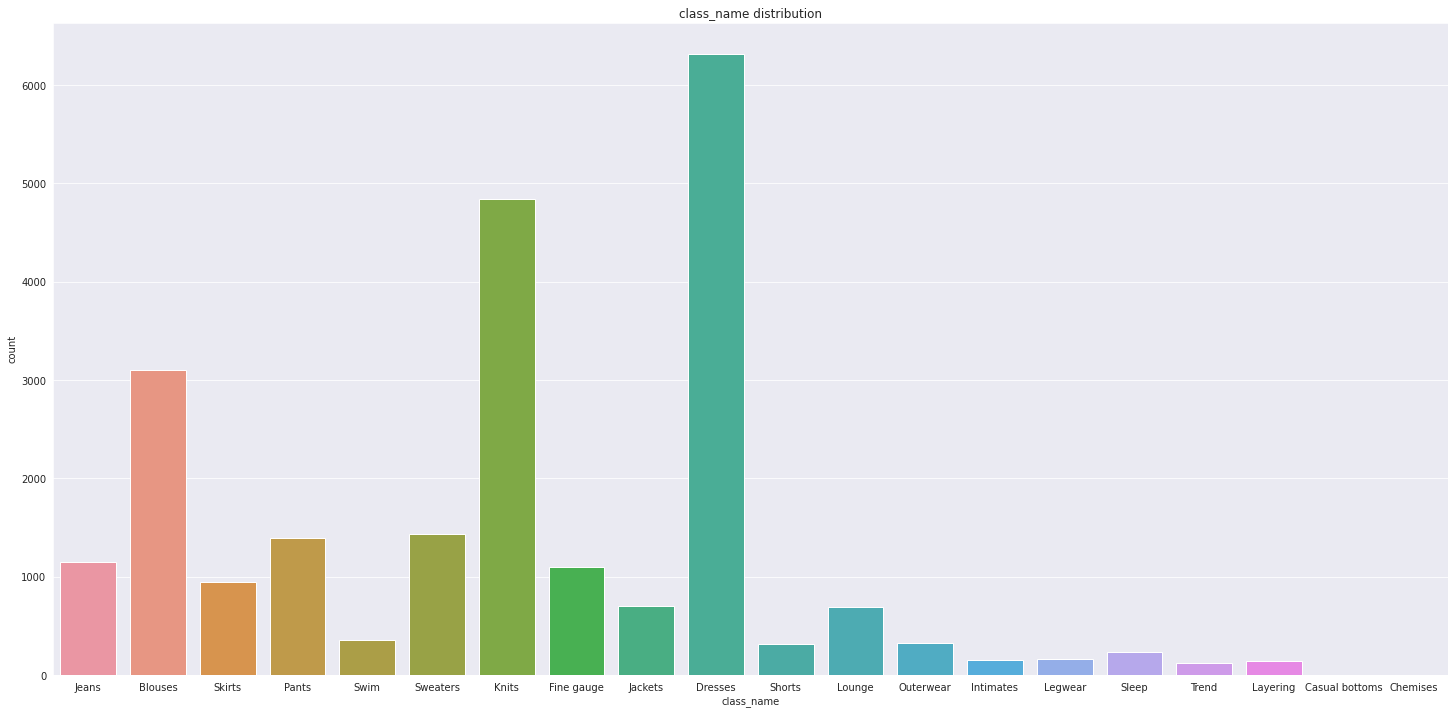

In [ ]:
plt.figure(figsize=(25, 12))
sns.countplot(x='class_name', data=data)
plt.title('class_name distribution')
plt.show()

**Tha graph shows that the most frequently bought types of clothes are dresses (with almost a quarter of datset), knits and blouses. The other categories make up less than one-twentieth of all the data.**

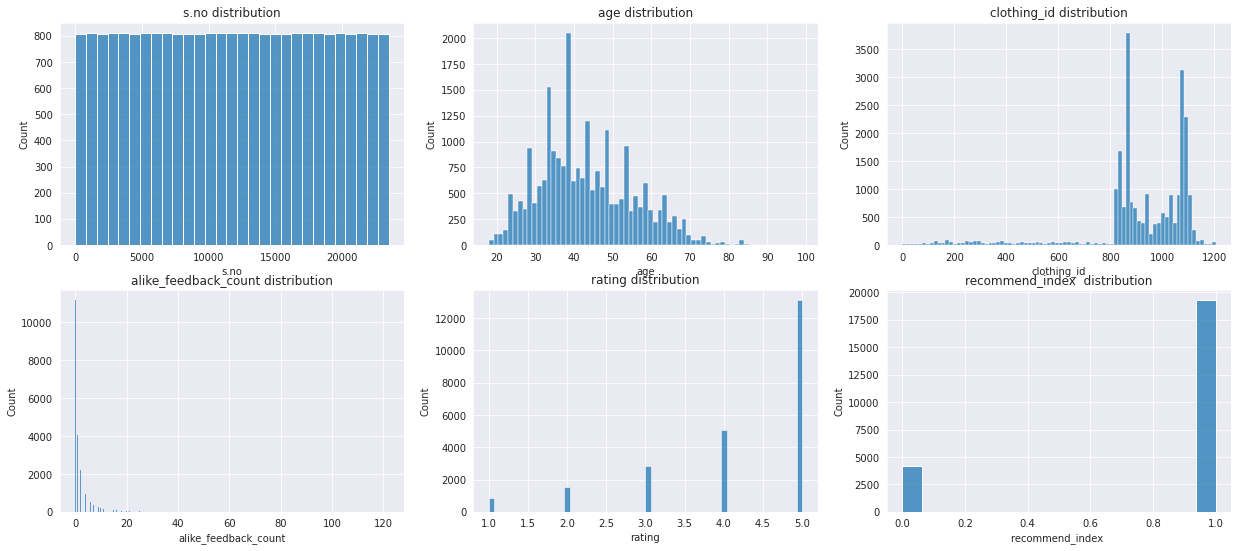

In [ ]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(21, 9))

col_list = list(data.select_dtypes(include='int64').columns)
for col, ax in zip(col_list, axes.flat):
    sns.histplot(data[col], ax=ax)
    ax.set_title(f'{col} distribution')
plt.show()

**S.no parameter is unique in each row, so its distribution is of no use.** 

**Age seems to be normally distributed. We can also notice that there are mostly middle aged customers (from 30 to 50) and only a few customers aged above 70.**

**As for cloting id, there are much less unique figures than the total number of rows, so some of clothes are bought more often than others.**

**If we look at alike_feedback_count feature, customers rarely give a feeadback to others' comments. This feature maybe quite uninformative.**

**As for number of clothes of specific rating, it has an upward trend as the rating goes up. More than a half of clothes in the dataset is of rating 5.**

It's interesting to look at rating distribution depending on recommend_index.

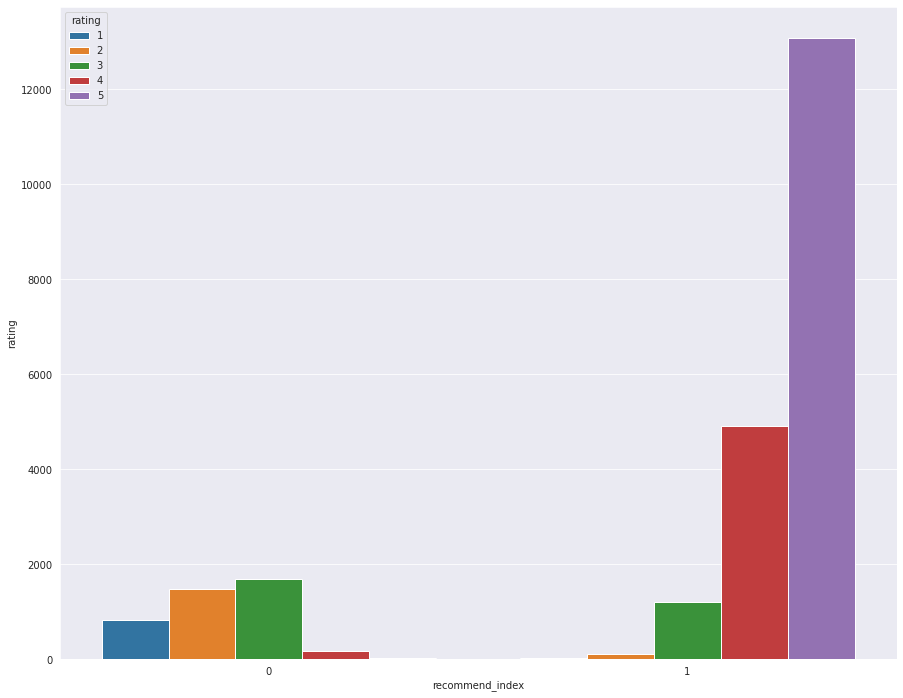

In [ ]:
plt.figure(figsize=(15, 12))
sns.barplot(x='recommend_index', y='rating', hue='rating', data=data, estimator=len)
plt.show()

We see that the rating of unrecommended items mainly doesn't exceed 3, whereas the rating of recommended ones is mainly above 3.

Let's also look at how many people of different ages buy jackets, further we'll use the data and test a hypothesis on it.

It doesn't look like a normal distribution.

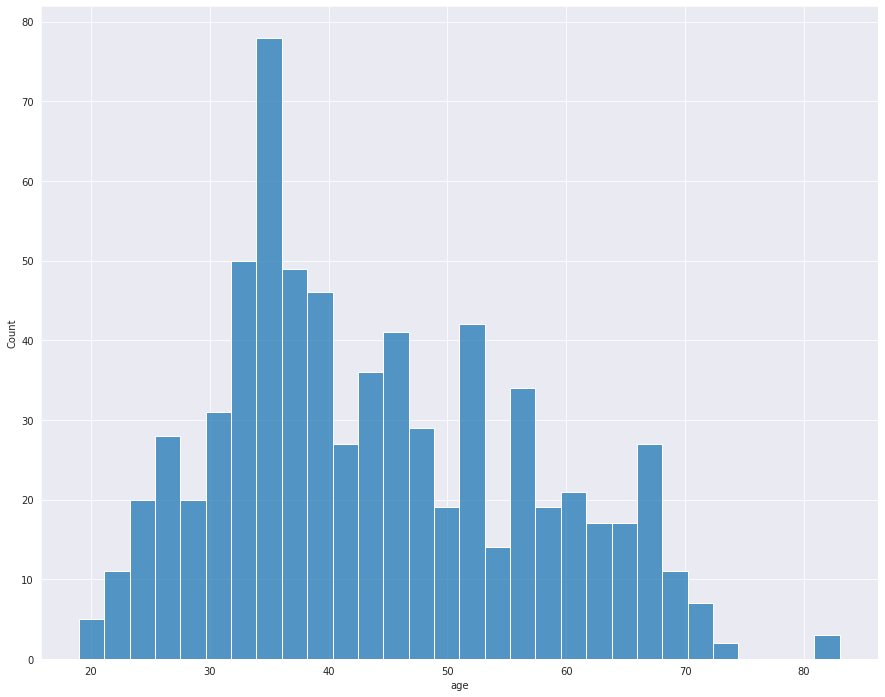

In [ ]:
plt.figure(figsize=(15, 12))
sns.histplot(data[data['class_name']=='Jackets']['age'], bins=30)
plt.show()

# **Statistical tests**

The critical value is 5% in all tests.

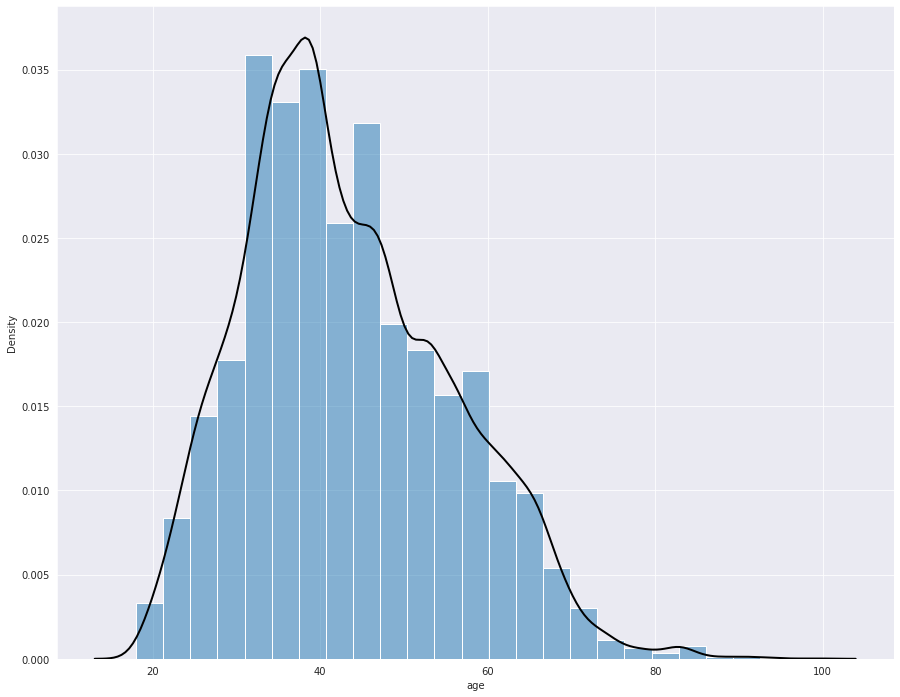

In [ ]:
plt.figure(figsize=(15, 12))
sns.histplot(data['age'], bins=25, kde=False, stat='density', alpha=0.5)
sns.kdeplot(data['age'], color='black', linewidth=2)
plt.show()

Age seems to be normally distributed, let's check with qq-plot as well.

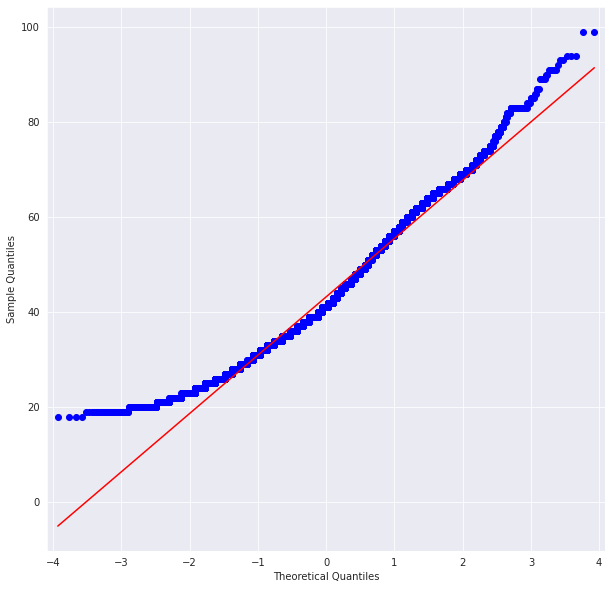

In [ ]:
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(10, 10))
#using line='s' parameter to compare the sample's distribution with a standard normal
#as data has a positive mean and standard deviation different from 1
sm.qqplot(data['age'], line='s', ax=ax)
fig.show()

So the distribution is mainly similar to normal.
 
Let's test a hypothesis that its mean is 40. We'll use Student's t-test for that because the sample is big enough and we do not know the true variance (so z-test is inappropriate).

In [ ]:
print(f'pvalue for "less" alternative = {sps.ttest_1samp(data["age"], 40, alternative="less").pvalue}')
print(f'pvalue for "less" alternative = {sps.ttest_1samp(data["age"], 40, alternative="greater").pvalue}')

pvalue for "less" alternative = 1.0
pvalue for "less" alternative = 0.0


We cannot reject our hypothesis for assumption that mean is less than 40, but we reject it for assumption that mean is greater than 40 (the true mean is likely to be greater than 40).

The next hypothesis to be tested will be: the average rating of recommended items is higher than the rating of clothes that were marked as 'not recommended'. We'll use a T-test assuming that two samples (recommended and non-recommended clothes) are independent.

$H_0$: two samples have identical average

$H_1$: "recommended" sample has greater average

In [ ]:
recommended_ratings = data[data['recommend_index'] == 1]['rating'].values
nonrecommended_ratings = data[data['recommend_index'] == 0]['rating'].values

sps.ttest_ind(recommended_ratings, nonrecommended_ratings, equal_var=False, alternative='greater')

Ttest_indResult(statistic=165.0341791699663, pvalue=0.0)

So we reject $H_0$ for alternative that the average rating of recommended items is higher. Items with higher rating are more likely to be recommended than the ones with low rating.

Now we go back to distribution of age of people who have bought jackets. We'll check that the median value of age is 40. As it is not normal and the sample is quiet small, we use sign test here. Alternative is two-sided (the median is not 40).

In [ ]:
from statsmodels.stats.descriptivestats import sign_test

age_values = data[data['class_name']=='Jackets']['age'].values

_, p_value_sign = sign_test(age_values, 40)
print(f'Sign test p-value: {p_value_sign:.4}')

Sign test p-value: 0.0857


We do not reject the hypothesis, but let's try a higher value of 41 year.

In [ ]:
_, p_value_sign = sign_test(age_values, 41)
print(f'Sign test p-value: {p_value_sign:.4}')

Sign test p-value: 0.5944


P-value is higher so median is more likely to be 41 than 40.

### Upgrading scipy

In [ ]:
!pip install --upgrade scipy==1.7.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.1 MB 47.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import scipy
scipy.__version__

'1.7.3'